# Data Scientists vs. Students: What does it take for a student to evolve into a data scientist?

![Looking for a way to evolve from a student to a data scientist](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcStMWCxO8c3zBbKItPJmBchITfF9jUMJmgevb1Mbi2XyaXBuMNL)

As an undergraduate student nearing his graduation, I have thousands of questions about pursuing a career as a data scientist. Currently enrolled in a bachelor in Biotechnology/ Economics, my journey in data science has mostly been navigated by self-learning and asking about others' experience. With the release of the 2019 Kaggle survey, I thought: "Why don't I seek for answers about about becoming a data scientist like a data scienst would? Using data!" 

Through my first ever attempt at a Kaggle competion, I will attempt to answer the question: "What does it take for a student to evolve into a data scientist". I will accomplish this by using the survey data to explore the difference in education and toolkit between the 2 subgroups of 'Students' and 'Data Scientists'. From this exploration, I hope to understand how data scientists and students approach data science and machine learning differently, and translate that into insights that I can take away from.

# Part A: Data Preparation

For the initial data preparation, I mainly performed 3 actions: 
* Ensure that there are sufficient data for the analysis
* Check the schema to understand any difference in data for each group
* Slice the data

In [1]:
#importing packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#setting options
pd.options.display.max_colwidth = 500
pd.set_option('display.max_columns', None)

In [2]:
#Loading the data
df = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv")
df = df.drop(df.index[0])

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In order to pursue this analysis, I needed to know that there are adequate data to work with. From over 19,000 observations in the survey, I learnt that 'Data Scientist' and 'Student' are the 2 most represented occupation in the survey population. There are around 4000 observations for each of this group, which should allow for a fair comparative analysis. 

In [3]:
df.Q5.value_counts()

Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: Q5, dtype: int64

Another consideration required was to look at the schema of the survey. According to the description, the length of the survey for each respondent is dependent on their experience, indicated through their answer for certain questions of the survey. Therefore, it is likely that the 'Student' group answered less question than a 'Data Scientist'.

From the schema, I learnt that Question 6 to 10 is excluded for the student group. These questions are focused on people who are currently working as it inquires about team size, salary and etc, which are not relevant to those who are 'Students'. Other than these questions, I also learnt later that question 29 to 34 were answered only by 'Data Scientists', as these question were about usage of Machine Learning products that were generally more applicable to a work setting.

In [4]:
#Loading the Schema
schema = pd.read_csv("../input/kaggle-survey-2019/survey_schema.csv")

In [5]:
#Create a function to obtain all the questions that are excluded for a given question in a schema
def schema_check(schema, n):
    schema_n = schema.iloc[n][1:]
    excluded_n = []
    for i, v in enumerate(schema_n):
        if v == '1':
            excluded_n.append(schema_n.index[i])
    return excluded_n

#Checking the schema for row 4, which correspond to questions that a
schema_check(schema, 4)

['Q10', 'Q11', 'Q6', 'Q7', 'Q8', 'Q9']

Finally, the data was slice to only keep those who answered 'Data Scientist' or 'Student' for question 5 regarding occupation. This left us with 8099 rows of data to work with. 

In [6]:
#Slice the data to only focus on the 2 groups of interest
df = df.loc[df['Q5'].isin(['Student', 'Data Scientist'])]
df.shape

(8099, 246)

# Part B: Data Scienst is the sexiest job of the 21st century?

In 2012, the Harvard Business Review published an article calling Data Scientist [the sexiest job of the 21st century](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century). Ever since, there have been a lot of discussion around the Data Scientist role and what makes it 'sexy'. Luckily, the 2019 Kaggle survey have the data to help us answer that.

## How much does a data scientist get paid?

As quoted from the aforementioned HBR article, 'A good data scientist will have many doors open to him or her, and salaries will be bid upward'. Many people including myself are tempted by the prospect of earning a great salary as a data scientist. While the distribution of salary amongst data scientists create a very beautiful distributed graph below, I was quite alarmed by the most common yearly compensation is between $0 and $999. However, the survey asked for all earning to be reported in USD, so geographical location must be taken into consideration as well.

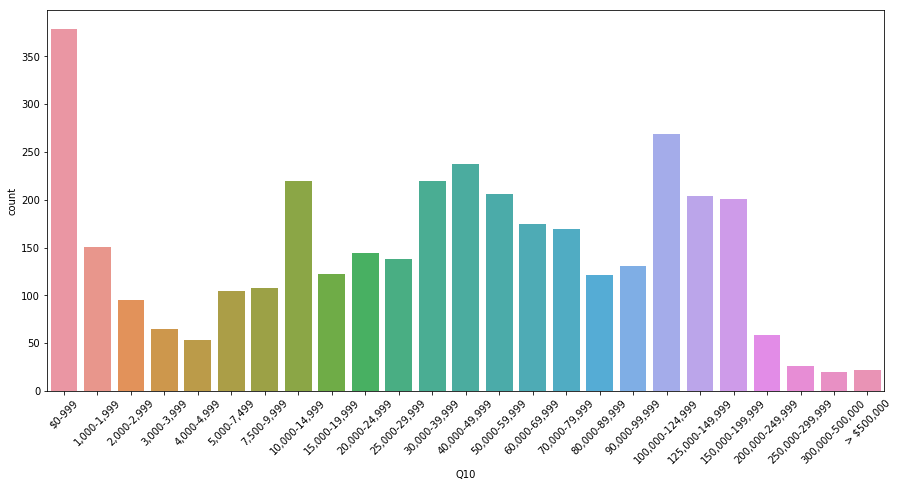

In [7]:
salary_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', 
                '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999', 
                '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', 
                '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', 
                '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']
fig_q10, ax_q10 = plt.subplots(figsize=(15,7))
ax_q10 = sns.countplot(x="Q10", data=df, order=salary_order).set_xticklabels(labels = salary_order, rotation=45)

In [8]:
Europe = ['France', 'Germany', 'Russia', 'Portugal', 'Italy', 'Spain',
         'Sweden', 'Hungary', 'Ireland', 'Belarus', 'Norway', 'Netherlands',
         'United Kingdom of Great Britain and Northern Ireland', 'Switzerland',
         'Denmark', 'Ukraine', 'Poland', 'Greece', 'Belgium', 'Austria', 
         'Romania', 'Czech Republic', ]
Asia = ['India', 'China', 'Japan', 'Pakistan', 'Turkey', 'Bangladesh',
       'South Korea', 'Taiwan', 'Thailand', 'Israel', 'Viet Nam', 'Singapore',
       'Republic of Korea', 'Iran, Islamic Republic of...', 'Malaysia', 
       'Indonesia', 'Philippines', 'Hong Kong (S.A.R.)', 'Saudi Arabia' ]
North_america =  ['United States of America', 'Canada', 'Mexico' ]
South_america = ['Argentina', 'Brazil', 'Chile', 'Columbia', 'Peru' ]
Oceania = ['Australia', 'New Zealand']
Africa = ['Algeria', 'South Africa', 'Egypt', 'Nigeria', 'Morocco', 'Tunisia',
         'Kenya', ]

In [9]:
def map_continent(i):
    if i in Europe:
        return 'Europe'
    if i in Asia:
        return 'Asia'
    if i in North_america:
        return 'North America'
    if i in South_america:
        return 'South America'
    if i in Oceania:
        return 'Oceania'
    if i in Africa:
        return 'Africa'
    else:
        return 'Other'
    
df['Continent'] = df['Q3'].apply(map_continent)

When breaking down the distribution of salary for data scientists into continents, here are some findings: 
* Many data scientists in Asia and Africa are in the lowest earning bracket of \$0-999. I suspect that this is because these regions have cheaper labours compare to other regions. 
* In South America, the majority of the data scientist salary is irregularly distributed between \$0 to \$60,000. You're likely going to find salary between \$10,000 to \$30,000. 
* Oceania has the smallest pool of data scientist salary for any region, but they are mostly high-earning data scientists, with most in the \$100,000 - \$124,999 bracket. 
* Europe seems to have the most 'normal' distribution of data scientist salary, with the tallest bar at the \$40,000 - \$49,999 bracket.
* North America has a large concentration of really well-paid data scientists, earning between \$100,000 to \$200,000. 

Prior to this, I definitely assume that if you want to earn a lot as a data scientist, I'd have to be in North America/ United States. Now I know that Oceania/ Australia should be a pretty good option too!

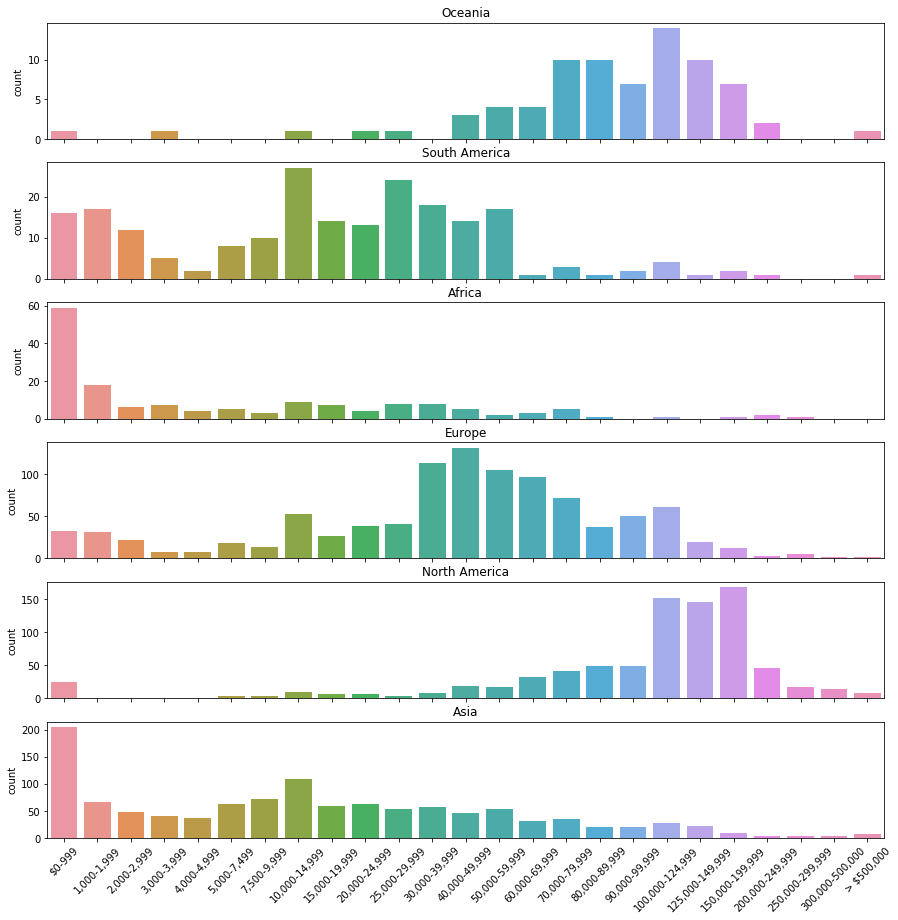

In [10]:
fig_cont, ax = plt.subplots(6, 1, figsize=(15,15), sharex=True, sharey=False)

ax[0] = sns.countplot(x="Q10", data=df[df.Continent == 'Oceania'], order=salary_order, ax=ax[0])
ax[1] = sns.countplot(x="Q10", data=df[df.Continent == 'South America'], order=salary_order, ax=ax[1])
ax[2] = sns.countplot(x="Q10", data=df[df.Continent == 'Africa'], order=salary_order, ax=ax[2])
ax[3] = sns.countplot(x="Q10", data=df[df.Continent == 'Europe'], order=salary_order, ax=ax[3])
ax[4] = sns.countplot(x="Q10", data=df[df.Continent == 'North America'], order=salary_order, ax=ax[4])
ax[5] = sns.countplot(x="Q10", data=df[df.Continent == 'Asia'], order=salary_order, ax=ax[5])

ax[0].set_title('Oceania')
ax[1].set_title('South America')
ax[2].set_title('Africa')
ax[3].set_title('Europe')
ax[4].set_title('North America')
ax[5].set_title('Asia')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('')
ax[4].set_xlabel('')
ax[5].set_xlabel('')

ax_rotate = ax[5].set_xticklabels(salary_order, rotation=45)

## What does a data scientist do?

In [11]:
def get_columns(question, df):
    col_names = []
    for i in range(len(df.columns)):
        if question in df.columns[i]:
            col_names.append(df.columns[i])
    return col_names

In [12]:
def clean_column_name(df1, df2):
    new_column_name = [] 
    for i in range(len(df1.columns)):
        new_name = df1.columns[i].replace(df2.columns[i] + '_', '')
        new_name = new_name.strip()
        new_column_name.append(new_name)
    return new_column_name

In [13]:
def create_dummy_multiple_question(num, df):
    question = 'Q' + str(num)
    df_q5 = df[['Q5']] 
    df_q = df[get_columns(question, df)[:-1]].fillna(0)
    df_dummy = pd.get_dummies(df_q, columns=df_q.columns)
    df_dummy = df_dummy[[c for c in df_dummy.columns if c.lower()[-1:] != '0']]
    df_dummy.columns = clean_column_name(df_dummy, df_q)
    return df_dummy.join(df_q5)

In [14]:
def plot_dummy(num, df):
    df_q = create_dummy_multiple_question(num, df).groupby('Q5').sum().transpose()
    df_q.plot.barh(figsize=(7,12))

In [15]:
def plot_dummy_vertical(num, df):
    df_q = create_dummy_multiple_question(num, df).groupby('Q5').sum().transpose()
    df_q.plot.bar(figsize=(15,7)).set_xticklabels(df_q.index.tolist(), rotation=25)

I remember having the early perception that most data scientists have to be proficient in machine learning. From this survey, this belief this verified by how promimnent activities such as experimentation and building prototypes with ML models are for a data scientist. However, I was surprised by how analyzing and understanding data to influence product or business decisions is the most frequent activity across data scientists. This definitely can change the perception that data scientists are purely technical specialists; being able to influence product or business decisions with understanding of data suggest that is it a role that also require well-rounded communication.

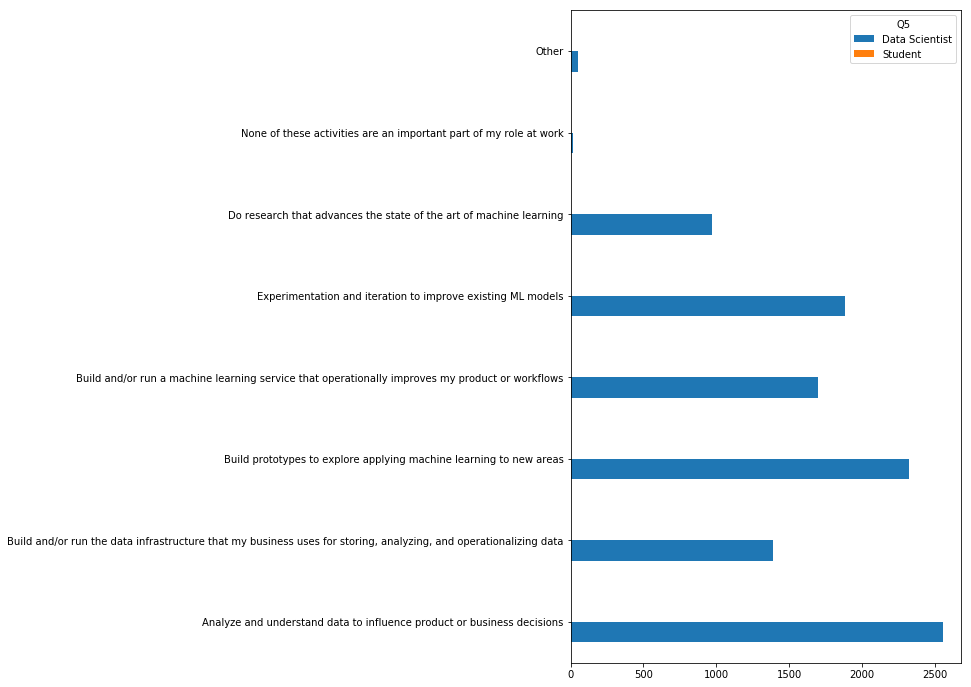

In [16]:
plot_dummy(9, df)

## How many people does a data scientist work with?

In [17]:
# Code for the heatmap adopted from Drazen Zaric.
# Visit https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec to
# read about his amazing work on creating this heatmap. 
# Visit https://www.kaggle.com/drazen/heatmap-with-sized-markers to see the code for this in action

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=0, horizontalalignment='center')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 

Given the prior observation regarding what a data scientist do, I was curious about how many people a data scientist typically work with. From this sized heatmap, a data scientist are likely to be either working in a very small team of 1-2 at a small startup company or in a team of 20+ at a big corporation. The bigger the company, the bigger the team you are working with, simple. However, it's interesting to note that there are quite a number of 3-4 people team and 5-9 people team for smaller companies of size 0-49. It'll be interesting to dive deeper into how data science teams operate in smaller companies and what values they will bring.   

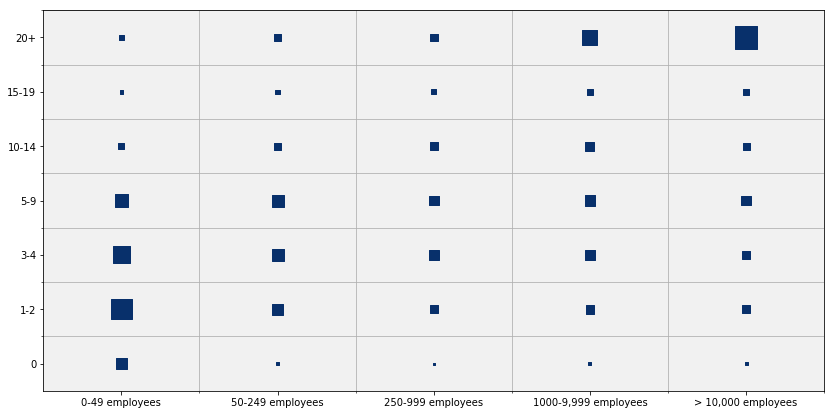

In [18]:
y_bin_labels = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']
x_bin_labels = ['0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '> 10,000 employees']

ds_size = df.groupby(['Q6', 'Q7']).count()[['Q5']].reset_index().replace(np.nan, 0)

plt.figure(figsize=(15, 7))
heatmap(
    x=ds_size['Q6'],
    y=ds_size['Q7'],
    size=ds_size['Q5'],
    #color=ds_size['Q5'],
    marker='s',
    x_order=x_bin_labels,
    y_order=y_bin_labels
)

# Part C: Who is a data scientist? Who is a student?

From this section onwards, I'll be exploring the difference between a data scientist and a student. For Part C, the main focus is to understand the demographic through some variables such as gender, age, education, experience and more.

THere's an overwelming ratio of male to female amongst data scientist, at roughly 7:1. A similar pattern is observed for students in the field as well. It should be noted that there are more female students than female data scientists in the survey, which could suggest that more women are becoming interested in the field.

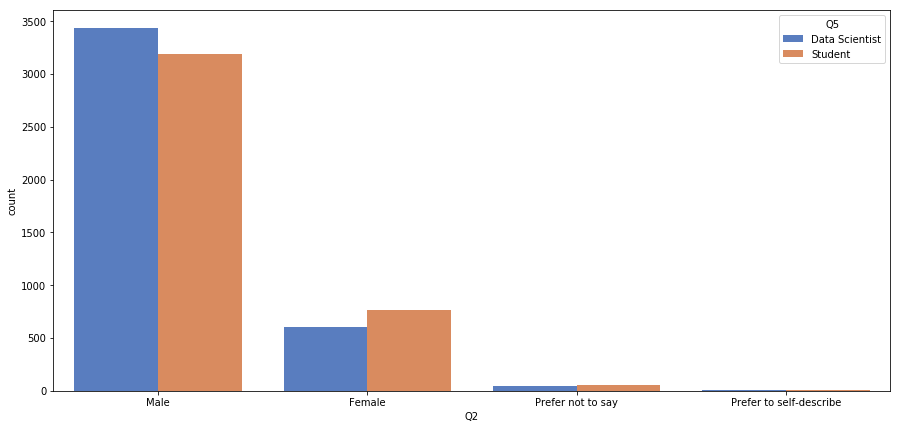

In [19]:
fig_q2, ax_q2 = plt.subplots(figsize=(15,7))
ax_q2 = sns.countplot(x="Q2", hue="Q5", data=df, palette='muted', order=df.Q2.unique())

Unsurprisingly, the majority of students are in the youngest bracket of 18-21, with a decreasing frequency at older age brackets. The number of data scientist overtakes students from the age bracket of 25-29 onwards. It is interesting to see that the distribution of data scientist is skewed to left, which shows that the majority of data scientists are quite young. As data science is a relatively new field, we can see that many in the field right now are likely to be younger people, most likely to have recently completed their bachelor's or currently pursuing some form of education. We'll certainly look for this in the next graph. It's definitely great to know that age is likely not a barrier to entry to a data scientist role. 

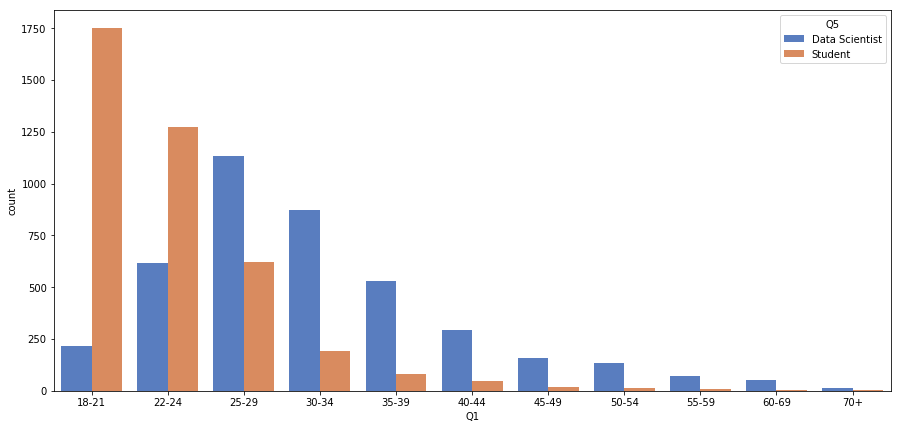

In [20]:
age_order = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
fig_q1, ax_q1 = plt.subplots(figsize=(15,7))
ax_q1 = sns.countplot(x="Q1", hue="Q5", data=df, palette='muted', order=age_order)

Most students have a bacherlor's degree, while there are also a considerably high number of those who are currently in their master. For data scientists, many seem to have attained a Master's degree, with a Doctoral degee a standout choice amongst many too. Based on this chart, it definitely suggest that attaining at least a Master's education is an attribute for many data scientists. 

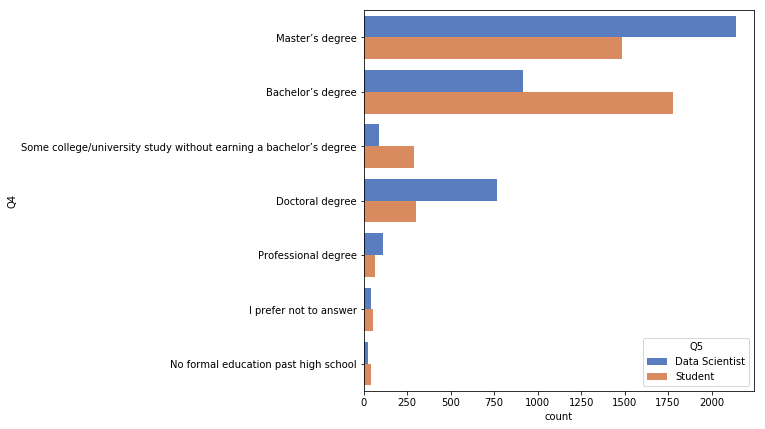

In [21]:
fig_q4, ax_q4 = plt.subplots(figsize=(7,7))
ax_q4 = sns.countplot(y="Q4", hue="Q5", data=df, palette='muted', order=df.Q4.unique())
#ax_q4.set_xticklabels(rotation=90)

Most students have less than a year of one to two years of coding experience. On the other hand, data scientists have a normal distribution of coding experience, with a peak in the 3-5 years categories. For most students, they are 2 to 4 years away from having as much coding experience as most data scientists. 

In [22]:
df['Q15'] = df['Q15'].replace('I have never written code', 'Never')

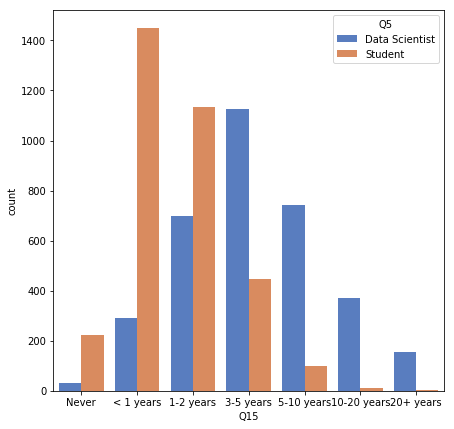

In [23]:
year_exp_order = ['Never', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
fig_q15, ax_q15 = plt.subplots(figsize=(7,7))
ax_q15 = sns.countplot(x="Q15", hue="Q5", data=df, palette='muted', order=year_exp_order)

# Part D: How different is the toolkit for a data scientist compare to a student?

### Learning Resources 

We'll begin this section by looking at Q12 and Q13 to understand the favourite media sources and data science learning platform for data scientists and students. 

In [24]:
df['Q12_Part_1'] = df['Q12_Part_1'].replace('Twitter (data science influencers)', 'Twitter')
df['Q12_Part_2'] = df['Q12_Part_2'].replace('Hacker News (https://news.ycombinator.com/)', 'Hacker News')
df['Q12_Part_3'] = df['Q12_Part_3'].replace('Reddit (r/machinelearning, r/datascience, etc)', 'Reddit')
df['Q12_Part_4'] = df['Q12_Part_4'].replace('Kaggle (forums, blog, social media, etc)', 'Kaggle')
df['Q12_Part_5'] = df['Q12_Part_5'].replace('Course Forums (forums.fast.ai, etc)', 'Course Forums')
df['Q12_Part_6'] = df['Q12_Part_6'].replace('YouTube (Cloud AI Adventures, Siraj Raval, etc)', 'YouTube')
df['Q12_Part_7'] = df['Q12_Part_7'].replace('Podcasts (Chai Time Data Science, Linear Digressions, etc)', 'Podcasts')
df['Q12_Part_8'] = df['Q12_Part_8'].replace('Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)', 'Blogs')
df['Q12_Part_9'] = df['Q12_Part_9'].replace('Journal Publications (traditional publications, preprint journals, etc)', 'Journal Publications')
df['Q12_Part_10'] = df['Q12_Part_10'].replace('Slack Communities (ods.ai, kagglenoobs, etc)', 'Slack Communities')

The top 3 favourite learning sources for both students and data scientists are Kaggle, Blogs and Youtube. Data scientists seem to have a stronger preference for blogs than students, while more students prefer YouTube compare to data scientists. Data scientists in general seem to enjoy a more diverse range of media than students. 

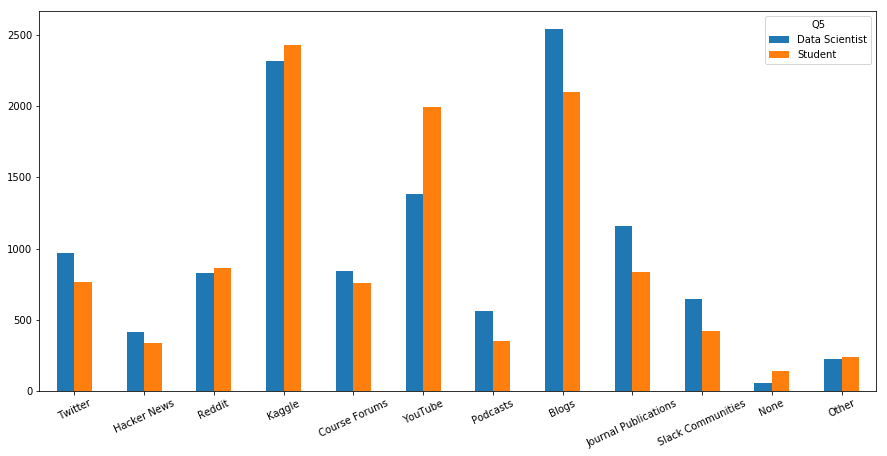

In [25]:
plot_dummy_vertical(12, df)

In [26]:
df['Q13_Part_6'] = df['Q13_Part_6'].replace("Kaggle Courses (i.e. Kaggle Learn)", "Kaggle Courses")
df['Q13_Part_10'] = df['Q13_Part_10'].replace("University Courses (resulting in a university degree)", "University Courses")

Coursera is a strongly preferred platform of choice choice for both data scientists and students. Meanwhile, other options such as Kaggle Courses, Udemy and University Courses are equally likely choices for both data scientists and students. It's worthy to note that platforms such as Udacity, edX and DataCamp seem to attract proportionaly more data scientists than students. Perhaps these platforms have content that are more appealing to experienced data scientists than beginner? 

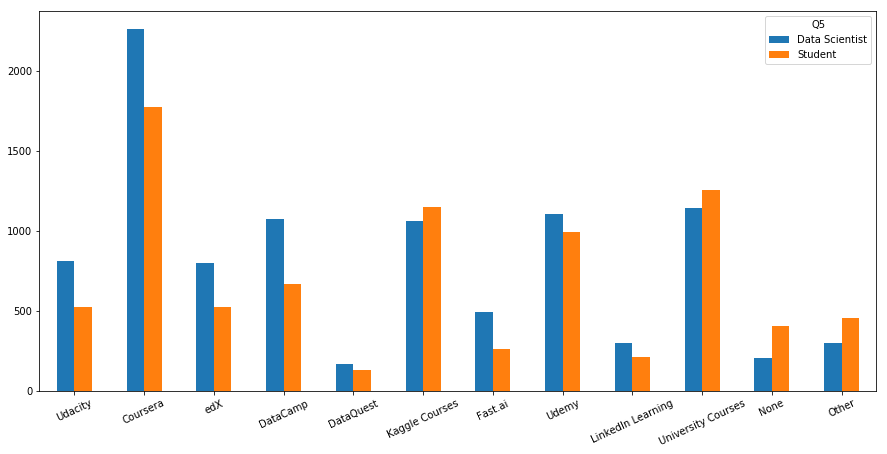

In [27]:
plot_dummy_vertical(13, df)

### Data Science Tools

In this section, we'll explore the data science tools used by data scientists and students, particularly Data analysis tool (Q14), IDE (Q16), Notebook products (Q17), Programming language (Q18) and data visualization library (Q20). 


In [28]:
df['Q14'] = df['Q14'].replace('Advanced statistical software (SPSS, SAS, etc.)', 'Advanced statistical software')
df['Q14'] = df['Q14'].replace('Local development environments (RStudio, JupyterLab, etc.)', 'Local development environments')
df['Q14'] = df['Q14'].replace('Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Basic statistical software')
df['Q14'] = df['Q14'].replace('Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Cloud-based data software & APIs')
df['Q14'] = df['Q14'].replace('Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Business intelligence software')

For both data scientists and students, using local development environments such as RStudio, JupyterLab, etc is the superior choice for data analysis. We can also observed that basic statistical software like Microsoft Excel, Google Sheets, etc are more widely used by students than by data scientists. The opposite is seen for Cloud-based data softwares and APIs such as AWS, GCP, Azure, etc, as more data scientists use them.

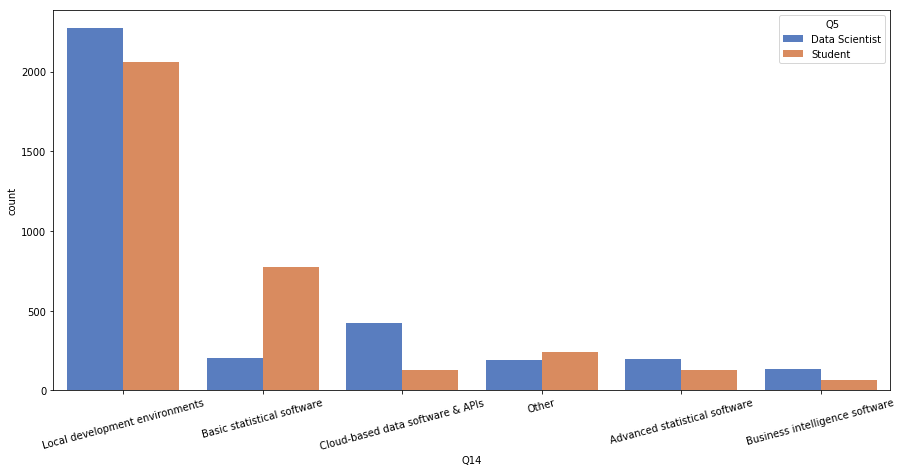

In [29]:
fig_q14, ax_q14 = plt.subplots(figsize=(15,7))
ax_q14 = sns.countplot(x="Q14", hue="Q5", data=df, palette='muted', order=df.Q14.value_counts().index)
label_14 = ax_q14.set_xticklabels(labels=df.Q14.value_counts().index, rotation=15, horizontalalignment='center')

In [30]:
df['Q16_Part_1'] = df['Q16_Part_1'].replace('Jupyter (JupyterLab, Jupyter Notebooks, etc) ', 'Jupyter')
df['Q16_Part_6'] = df['Q16_Part_6'].replace(' Visual Studio / Visual Studio Code ', 'Visual Studio')

Jupyter is a standout choice for both data scientists and students alike in terms of IDE. Other notebooks such as RStudio, PyCharm, Notepad++, Vim / Emacs are more used by data scientists compared to students. A noteworthy observation is that MATLAB is used by significantly more students compared to data scientist. This perhaps could suggest that MATLAB is still widely used in an academic setting for learning, while it is not as widely used in practice.

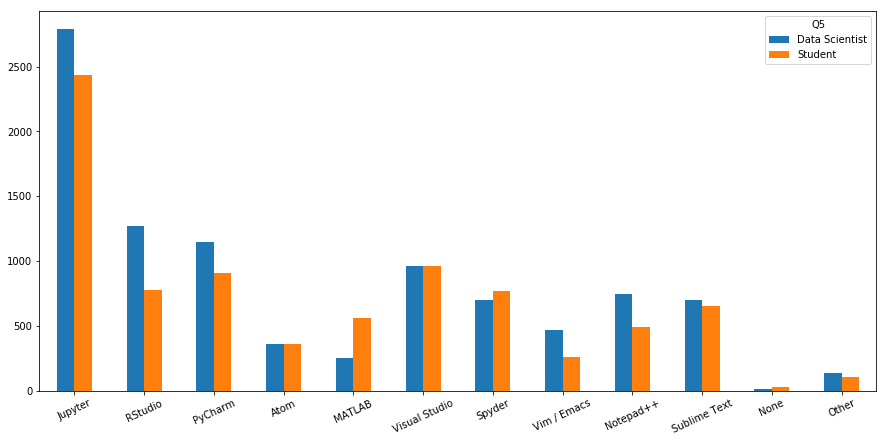

In [31]:
plot_dummy_vertical(16, df)

In [32]:
df['Q17_Part_1'] = df['Q17_Part_1'].replace(' Kaggle Notebooks (Kernels) ', 'Kaggle Kernels')
df['Q17_Part_4'] = df['Q17_Part_4'].replace(' Google Cloud Notebook Products (AI Platform, Datalab, etc) ', 'Google Cloud Notebook Products')
df['Q17_Part_10'] = df['Q17_Part_10'].replace('AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc) ', 'AWS Notebook Products')

Kaggle Kernels and Google Colab are the most popular choices of notebook products for students and data scientists alike. It should be noted that many respondent also suggest that they do not use any of these notebook products, which could be related to the fact that many respondent prefers to use local development environment. Amongst notebook products offered by the 3 major cloud computing companies (Microsoft, Google and Amazon's AWS), AWS seems to be overwhelmingly more popular to data scientists than students. This could suggest that Microsoft and Google have adapted their respective notebook products to be more friendly to non-professionals. 

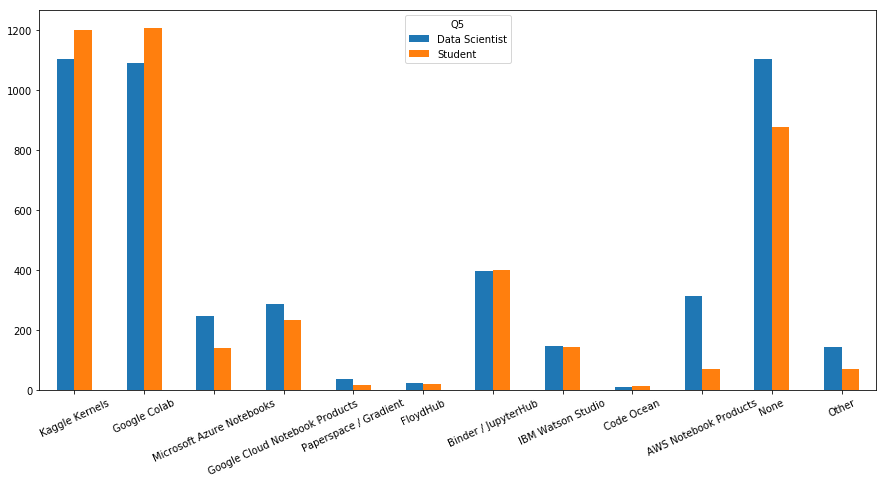

In [33]:
plot_dummy_vertical(17, df)

As expected, Python, SQL and R form the trinity of programming language for data scientists. Meanwhile, for students, only Python is a clear standout from the rest. It's interesting to note that C, C++, Java and MATLAB are significantly more popular choices amongst students than data scientists. This could suggest that the individuals found in students come from diverse backgrounds and disciplines in computer science and engineering, where these languages are more common. Another distinction can be observed with Bash, as it is far more common to data scientists than students. 

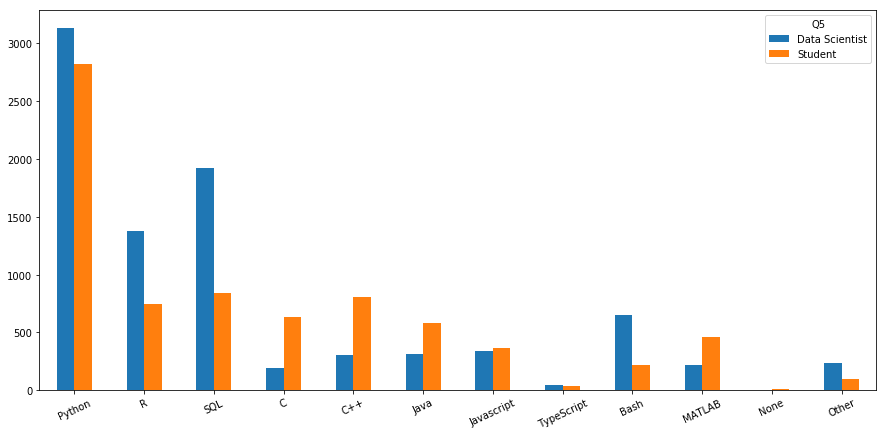

In [34]:
plot_dummy_vertical(18, df)

With an overwhelming number of respondent using Python as their programming language, it is unsurprisng to see Matplotlib and Seaborn as the dominant choice for data visualization for both data scientists and students. Plotly and Seaborn are a lot more common amongst data scientists compared to students. This is also observed for Ggplot, Shiny and D3.js. Data scientists seems to have a bigger exposure to a number of options for data visualization compared to students. 

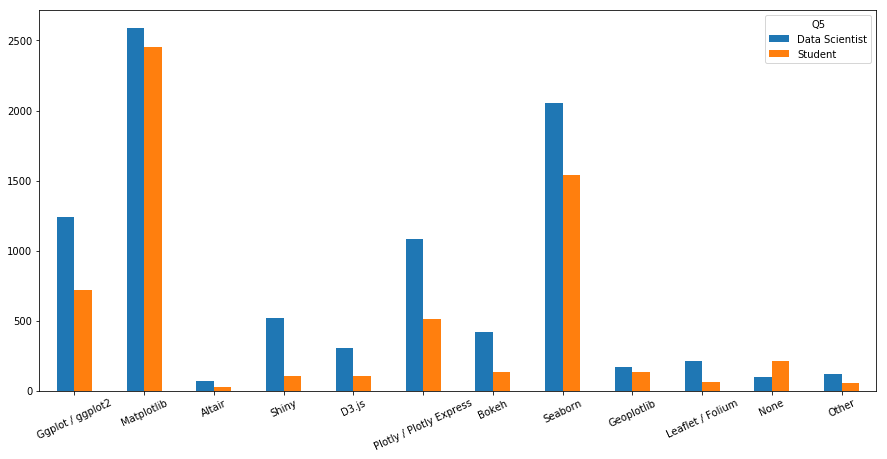

In [35]:
plot_dummy_vertical(20, df)

### Machine Learning Tools

This section explore the machine learning tools used by students and data scientists. In particular, we'll explore the choices of machine learning algorithm (Q24), automated machine learning tools (Q25), computer vision methods (Q26), NLP methods (Q27) and machine learning frameworks (Q28). 

Amongst data scientists, linear regression, decision trees/ random forests and gradient boosting machines are the top 3 choices in term of machine learning methods. A similar pattern is can also be observed amongst students, except that convolutional neural network takes the 3rd place spot. Gradient boosting machines seem to be a significantly more popular choice for data scientists compared to students. Perhaps this is something students who want to become data scientists should pay attention to.

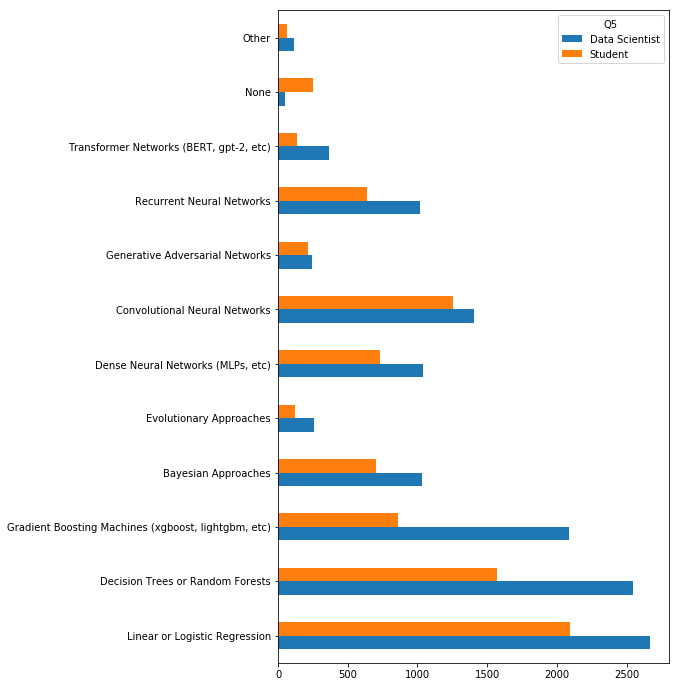

In [36]:
plot_dummy(24, df)

Surprisingly, automated machine learning tools aren't popular amongst both data scientists and students. I would have expected data scientists to have used a lot of automation for their works, but perhaps that approach is not widely used in the professional world. Amongst thost who do use automated machine learning tools, automated model selection is the most common choice for both data scientists and students. Automated hyperparameter tuning is also a fairly common practice for data scientists who use automated processes, a lot less so for students. 

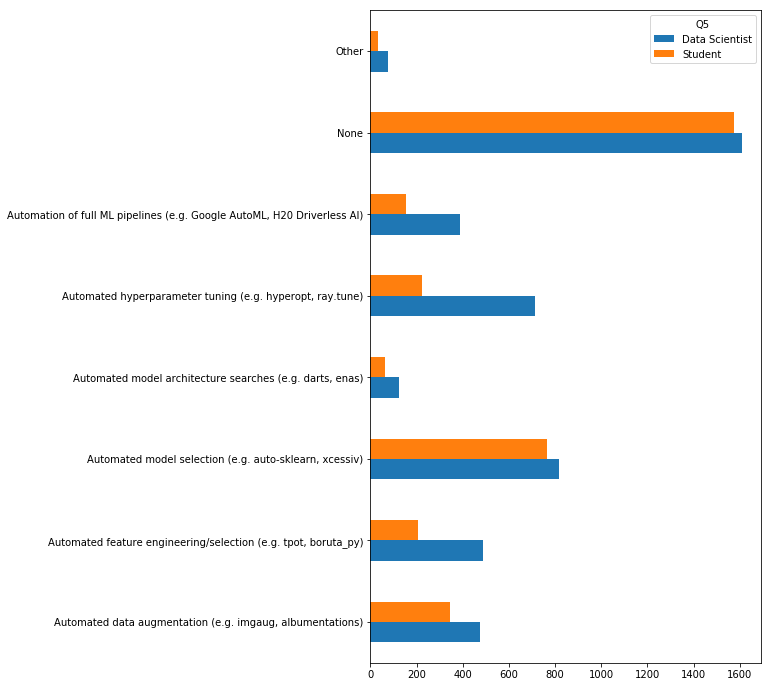

In [37]:
plot_dummy(25, df)

The distribution of computer vision method looks almost identical for data scientists and students, with Image classification and general purpose networks being the top choice for both groups. 

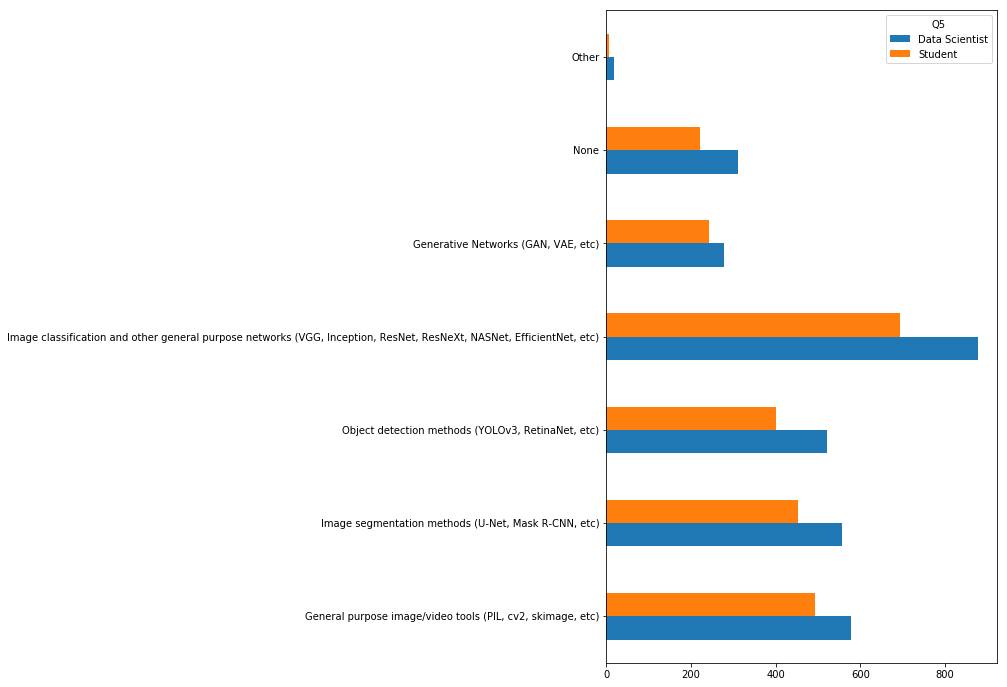

In [38]:
plot_dummy(26, df)

In term of NLP, word embedding and encoder-decorder model are popular choices for both groups, and these choices are more common for data scientists than students. Transformer language model is a standout 3rd place choice for data scientists, but it is not widely recognized by students. 

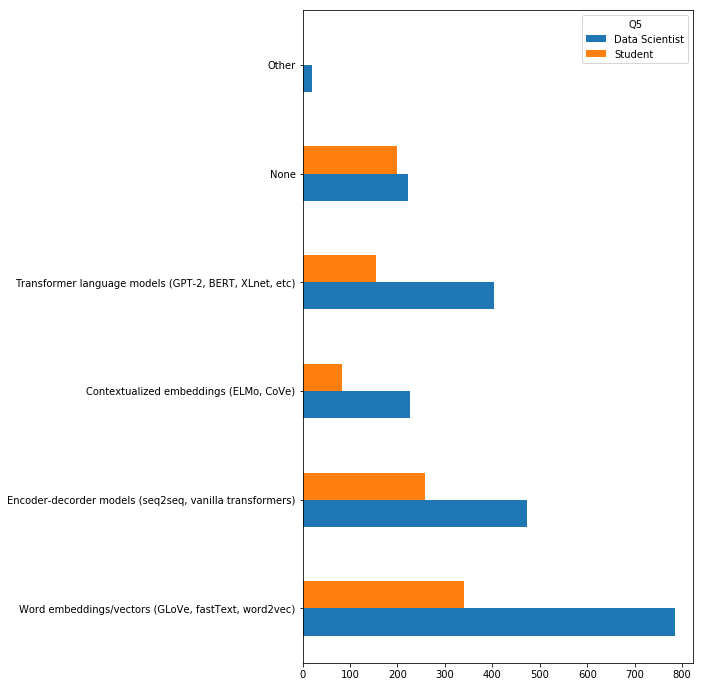

In [39]:
plot_dummy(27, df)

In term of ML framework, scikit-learn is unsurprisingly a popolar framework for both data scientists and students, given that it is based in Python. Similar to an earlier observation regarding gradient boosting, Xgboost is comparatively more popular amongst data scientists than students. 

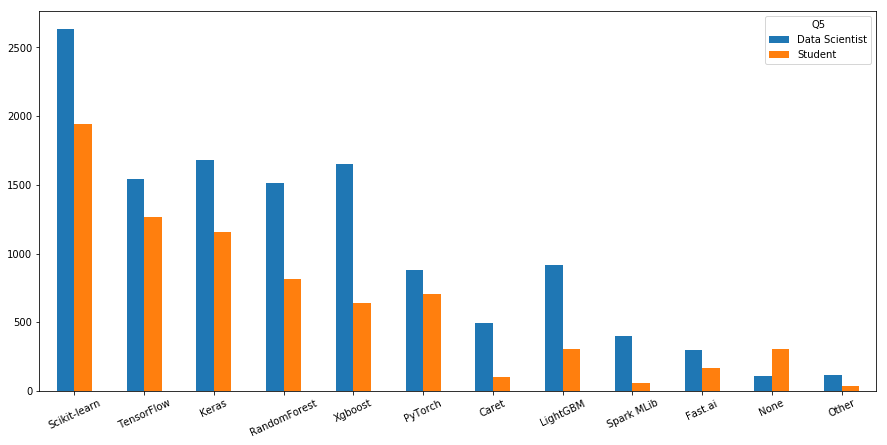

In [40]:
plot_dummy_vertical(28, df)

### Data Scientists Machine Learning Product

This section will focus on investigating the use of machine learning products by data scientists. Most of these products are cloud-based, and will be explored in the following order: Cloud computing platform (Q29), Cloud Computing Product (Q30), Big Data/ Analytic Product(Q31), ML Product (Q32) and Relational Database (Q34). 

With the cloud computing market dominated by the trinity of AWS, GCP and Microsoft Azure, it is unsurprising to see these three giants dominating in the survey. While AWS also dominates in the world of data scientists, it is interesting to see that GCP have gained more favour amongst data scientists compared to Microsoft Azure. There's large number of data scientists who are unexposed to cloud computing products, so it could perhap suggest a major opportunity for any cloud provider to target data scientists.

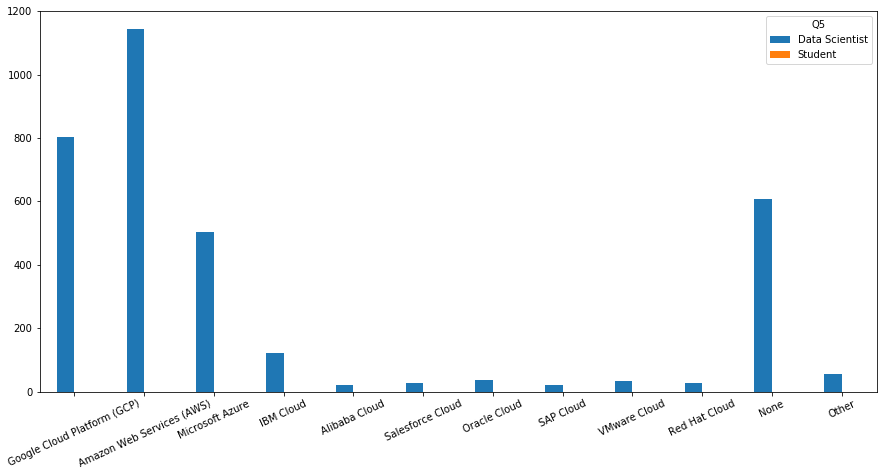

In [41]:
plot_dummy_vertical(29, df)

For question 30, 31 and 32, there's a huge peak for the column None, which suggest that a majority of data scientists do not use the cloud for computing, analytic or machine learning. This is a particularly strange thing to observe, given that Q29 established that many data scientists are using one of the 3 major cloud computing giants. 

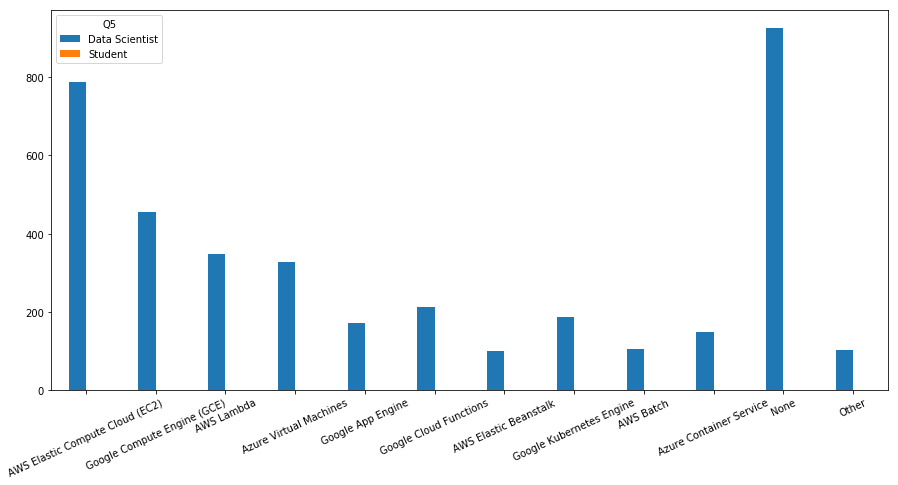

In [42]:
plot_dummy_vertical(30, df)

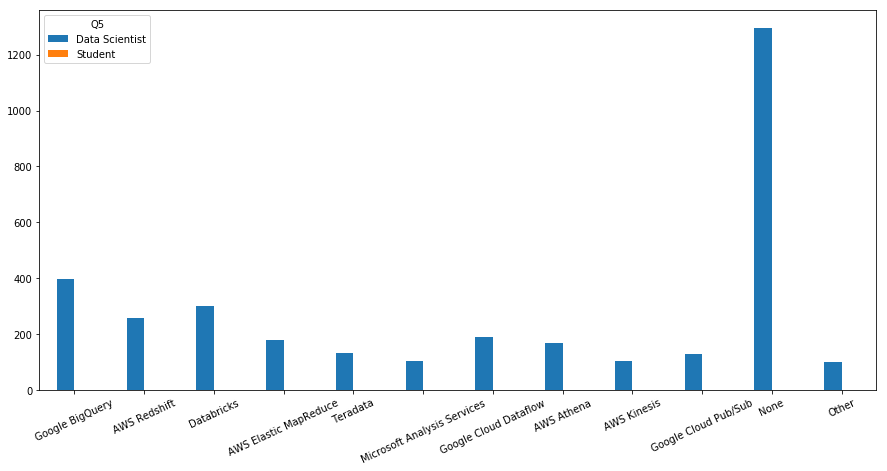

In [43]:
plot_dummy_vertical(31, df)

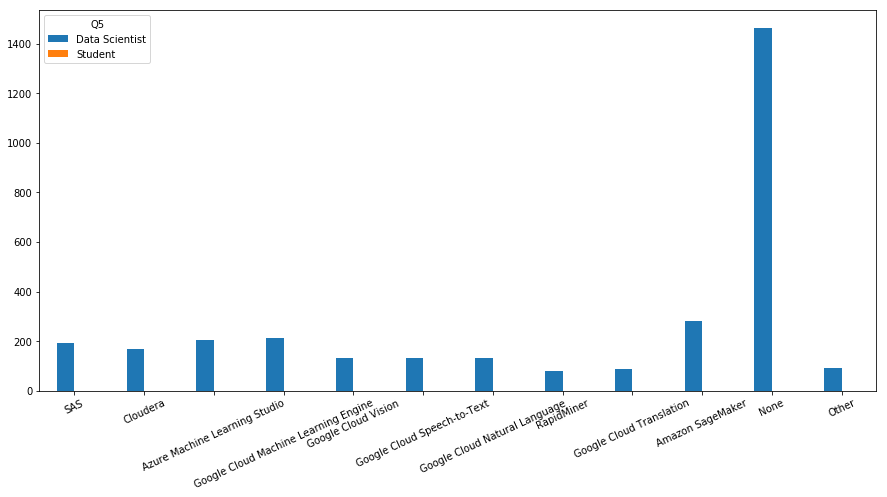

In [44]:
plot_dummy_vertical(32, df)

Here to confirm that SQL is very important for data scientists. 

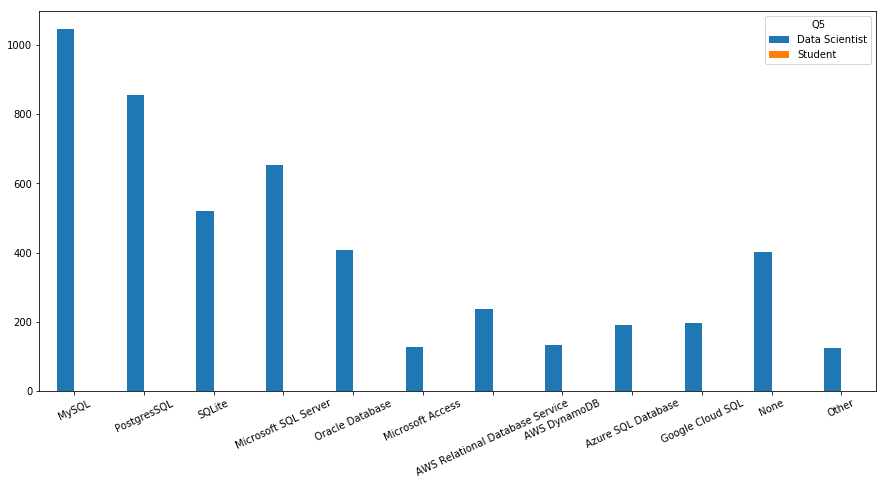

In [45]:
plot_dummy_vertical(34, df)

# Part E: Final Thoughts

Data Scientists vs. Students. This analysis has embarked me on an exciting adventure and gave me a lot of interesting learning about how a student can evolve into a data scientists. Here's a summary of some of the learning from this survey. 

* Data scientist salary range can vary greatly depending where you are from. If you want to aim for a salary of $100,000+ a year, you are probably more likely to find it in North America or Oceania. 
* While many believe that data scientists will have to do some machine learning, their role is also as much about understanding data to influence business decisions
* Most data scientists are relative young, so it is a role that many students can aim to pursue right after they graduate. 
* However, many data scientists hold a Master's degree, so it would be wise to consider pursuing one in your path to becoming a data scientist. 
* Data scientists have a wide selection of media sources for data science information. As a student, you should consider exploring your sources too. 
* In term of data science toolkit, Jupyter, Kaggle Kernels, Google Colab, Python, R, SQL, Matploblib and Seaborn are expected items for a data scientists. 
* Any students learning machine learning should pay attention to linear regression, decision tree/random forest as well as Boosted Gradient Machines. Not many students pay attention to Boosted Gradient Machines, but it is a machine learning method widely used amongst data scientists.

![Evolving!~~!!@~@#!](https://pm1.narvii.com/5809/d524bfa8ebb68d01f4627de2df73cf81c06ea91c_hq.jpg)

Thank you so much for reading this kernel. This is my first time performing a data analysis for a Kaggle competition. Please provide me with any feedback in the comment section. Have a great day!